## Excercise 2: Basic Neural Networks and Computer Vision

In [61]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### 2.1. Define and Visualize Dataset

In [62]:
# Define the Train/Val Data Split
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

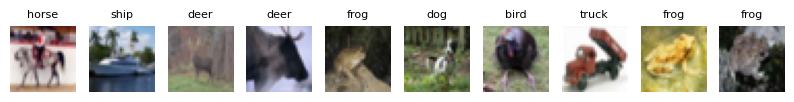

In [63]:
# Function to Plot 10 Images
class_names = ds_info.features['label'].int2str
def plot_images(dataset, n_images=10):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(n_images)):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names(label), fontsize=8)
        plt.axis('off')
    plt.show()

# Visualize 10 images from the Training Set
plot_images(ds_train)

In [64]:
# Define the Pre-processing and Data Augmentation
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# Define the Training Data Dataloader
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Define the Testing Data Dataloader
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

### 2.2. Simple Model MLP Model

In [77]:
def plot_history(history_input):
    plt.plot(history_input.history['sparse_categorical_accuracy'], label='accuracy')
    plt.plot(history_input.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    return None

In [70]:
# Define the basic Architecture For the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

# Define the Optimizor
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train the Model
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0533 - sparse_categorical_accuracy: 0.2668 - val_loss: 1.7898 - val_sparse_categorical_accuracy: 0.3657
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7727 - sparse_categorical_accuracy: 0.3746 - val_loss: 1.7469 - val_sparse_categorical_accuracy: 0.3722
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7192 - sparse_categorical_accuracy: 0.3921 - val_loss: 1.6718 - val_sparse_categorical_accuracy: 0.4083
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6695 - sparse_categorical_accuracy: 0.4061 - val_loss: 1.6744 - val_sparse_categorical_accuracy: 0.4006
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6416 - sparse_categorical_accuracy: 0.4178 - val_loss: 1.6266 - val_sparse_categorical_accuracy: 0.4230
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6085 - sparse_categorical_accuracy: 0.4325 - val_loss: 1.6129 - val_sparse_categorical_accuracy: 0.4286
Epoch 7/20
391/

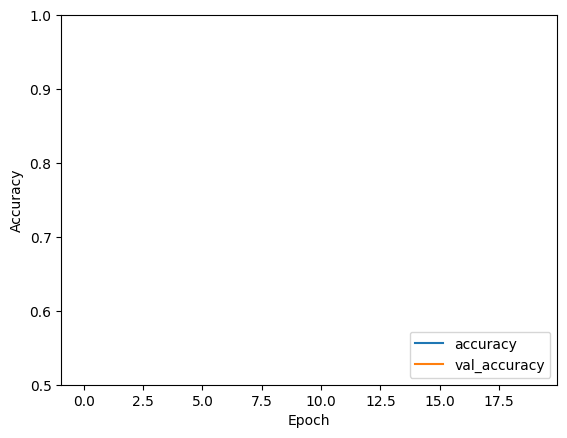

In [73]:
plot_history(history)

### 2.3. Excercise: Try Creating a CNN to improve accuracy

In [68]:

################### TO DO  BEGIN ###################
# Define the basic Architecture For the Model
model_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # 10 output neurons for 10 classes
])
################### TO DO END ####################
# Define the Optimizor
model_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train the Model
history_v2 = model_v2.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20


c:\ProgramData\Anaconda3\envs\tf-n\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.8775 - sparse_categorical_accuracy: 0.3149 - val_loss: 1.4191 - val_sparse_categorical_accuracy: 0.4880
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3946 - sparse_categorical_accuracy: 0.5073 - val_loss: 1.2908 - val_sparse_categorical_accuracy: 0.5481
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.2637 - sparse_categorical_accuracy: 0.5545 - val_loss: 1.2174 - val_sparse_categorical_accuracy: 0.5739
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1883 - sparse_categorical_accuracy: 0.5831 - val_loss: 1.1504 - val_sparse_categorical_accuracy: 0.5976
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1253 - sparse_categorical_accuracy: 0.6070 - val_loss: 1.1082 - val_sparse_categorical_accuracy: 0.6134
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0729 - sparse_categorical_accuracy: 0.6229 - val_loss: 1.0837 - val_sparse_categorical_accuracy: 0.6226
Epoch 7/20
391/

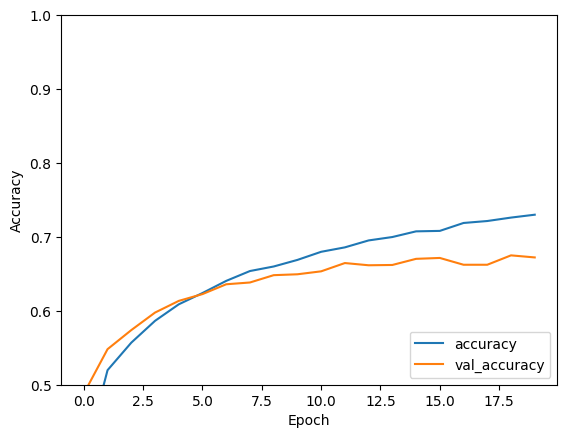

In [74]:
plot_history(history_v2)